# Online Food Dataset
**Alunos:**  
Rafaela de C. M. Pinheiro - 121038166  
Gabriel Vieira do Amaral - 121069963
#### link: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset/data




✅ Avalie os atributos numéricos utilizando as medidas de posição e dispersão vistas em aula.  
✅ Gere histogramas e gráficos boxplots para os atributos que forem analisados.  
✅ determine para os atributos numéricos quais dados são considerados outliers se você usar IQR e 3 desvios padrões. Existem pontos que são classificados como outliers por apenas um dos métodos?  
✅ se você remover os outliers, como isso afeta as medidas de posição e dispersão que você obteve ?  
✅ existem atributos que possuem variância zero ou próxima de zero?  
✅ caso o seu dataset contenha valores NaN, decida se estes valores devem ser preenchidos pela média ou pela mediana. Justifique sua escolha.   
✅ verifique se existem dados duplicados.   
✅ para os atributos numéricos, faça: (a) normalização; (b) padronização; (c) padronização com IQR  
✅ para os atributos categóricos, transforme estes atributos para as 3 formas de transformação apresentada no slide  

In [37]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
dataset = pd.read_csv('onlinefoods.csv')
print(dataset.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

### Avaliando Medidas de Posição
Como atributos numéricos, temos: idade e tamanho da família.

In [38]:
age = dataset['Age']
family_size = dataset['Family size']


# média
mediaAge = np.mean(age)

mediaFS = np.mean(family_size)

# moda
modaAge = sp.stats.mode(age)
modaFS = sp.stats.mode(family_size)

# mediana
medianaAge = np.median(age)
medianaFS = np.median(family_size)

# Z-score
zAge = sp.stats.zscore(age)
zFS = sp.stats.zscore(family_size)

# PRINTS

print("MEDIAS")
print('Média da idade: ', mediaAge)
print('Média do tamanho da família: ', mediaFS)
print("______________________")

print("MODAS")
print('Moda da idade - Elemento: ', modaAge[0])
print('Moda da idade - Frequencia: ', modaAge[1])
print('Moda do tamanho da familia - Elemento: ', modaFS[0])
print('Moda do tamanho da familia - Frequencia: ', modaFS[1])
print("______________________")

print("MEDIANAS")
print('Mediana da idade: ', float(medianaAge))
print('Mediana do tamanho da familia: ', float(medianaFS))
print("______________________")

print("Z-SCORE")
print('Z-score da idade: ', zAge)
print('Z-score do tamanho da familia: ', zFS)



MEDIAS
Média da idade:  24.628865979381445
Média do tamanho da família:  3.2809278350515463
______________________
MODAS
Moda da idade - Elemento:  23
Moda da idade - Frequencia:  73
Moda do tamanho da familia - Elemento:  3
Moda do tamanho da familia - Frequencia:  117
______________________
MEDIANAS
Mediana da idade:  24.0
Mediana do tamanho da familia:  3.0
______________________
Z-SCORE
Z-score da idade:  0     -1.557620
1     -0.211614
2     -0.884617
3     -0.884617
4     -0.884617
         ...   
383   -0.548116
384   -0.548116
385   -0.884617
386   -0.548116
387   -0.548116
Name: Age, Length: 388, dtype: float64
Z-score do tamanho da familia:  0      0.532929
1     -0.208205
2     -0.208205
3      2.015198
4      0.532929
         ...   
383   -0.949340
384    0.532929
385    1.274064
386   -0.949340
387    1.274064
Name: Family size, Length: 388, dtype: float64


### Avaliando Medidas de Dispersão

In [39]:
# desvio padrão

stdAge = np.std(age)
stdFS = np.std(family_size)

# variância

varAge = np.var(age)
varFS = np.var(family_size)

# quartis
Q1A = np.percentile(age, 25)
Q1FS = np.percentile(family_size, 25)
Q2A = np.percentile(age, 50)
Q2FS = np.percentile(family_size, 50)
Q3A = np.percentile(age, 75)
Q3FS = np.percentile(family_size, 75)
Q4A = np.percentile(age, 100)
Q4FS = np.percentile(family_size, 100)
IQRA = Q3A - Q1A
IQRF = Q3FS - Q1FS    

print("DESVIO PADRÃO")
print('Desvio padrão da idade: ', stdAge)
print('Desvio padrão do tamanho da família: ', stdFS)
print("______________________")
print("VARIÂNCIA")
print('Variância da idade: ', varAge)
print('Variância do tamanho da família: ', varFS)
print("______________________")
print("QUARTIS")
print('Idade')
print('Quartil 1 da idade: ', Q1A)
print('Quartil 2 da idade: ', Q2A)
print('Quartil 3 da idade: ', Q3A)
print('IQR da idade: ', IQRA)
print("----------------------")
print('Tamanho da família')
print('Quartil 1 do tamanho da familia: ', Q1FS)
print('Quartil 2 do tamanho da familia: ', Q2FS)
print('Quartil 3 do tamanho da familia: ', Q3FS)
print('IQR do tamanho da familia: ', IQRF)

DESVIO PADRÃO
Desvio padrão da idade:  2.9717556601591526
Desvio padrão do tamanho da família:  1.3492828048914451
______________________
VARIÂNCIA
Variância da idade:  8.83133170368796
Variância do tamanho da família:  1.8205640875757254
______________________
QUARTIS
Idade
Quartil 1 da idade:  23.0
Quartil 2 da idade:  24.0
Quartil 3 da idade:  26.0
IQR da idade:  3.0
----------------------
Tamanho da família
Quartil 1 do tamanho da familia:  2.0
Quartil 2 do tamanho da familia:  3.0
Quartil 3 do tamanho da familia:  4.0
IQR do tamanho da familia:  2.0


### Histogramas e Boxplots

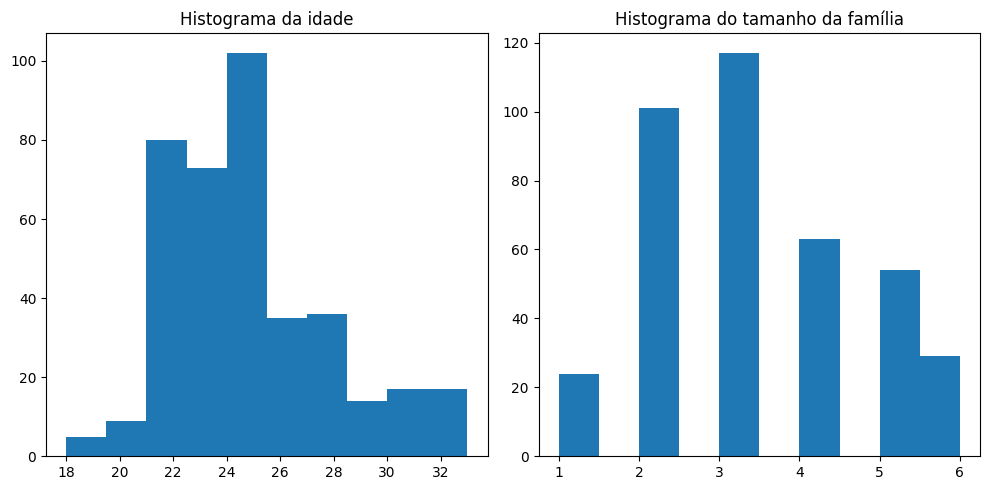

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Cria uma figura com 2 subplots

# Primeiro histograma
axs[0].hist(age)
axs[0].set_title('Histograma da idade')

# Segundo histograma
axs[1].hist(family_size)
axs[1].set_title('Histograma do tamanho da família')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

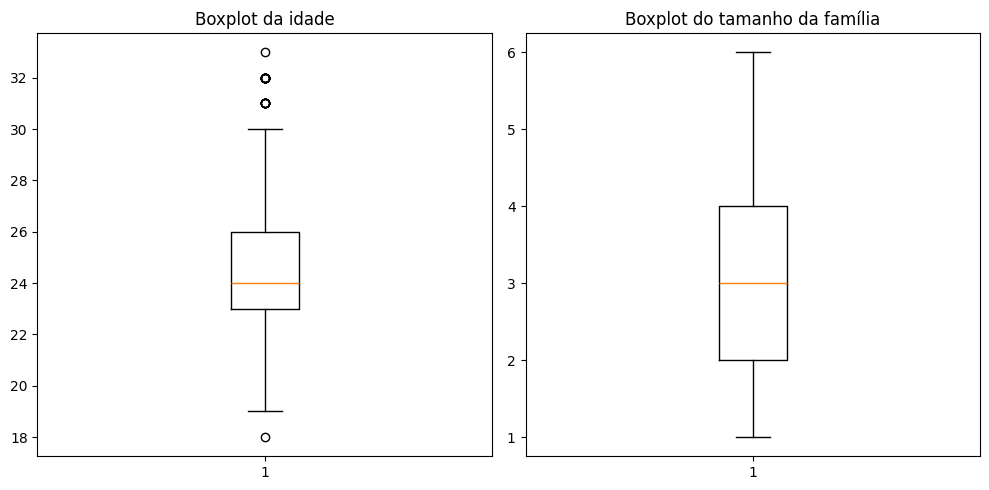

In [41]:
# Boxplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Cria uma figura com 2 subplots

# Primeiro boxplot
axs[0].boxplot(age)
axs[0].set_title('Boxplot da idade')

# Segundo boxplot
axs[1].boxplot(family_size)
axs[1].set_title('Boxplot do tamanho da família')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Outliers

In [42]:
# Outliers por IQR
infA = Q1A - 1.5 * IQRA
supA = Q3A + 1.5 * IQRA

infFS = Q1FS - 1.5 * IQRF
supFS = Q3FS + 1.5 * IQRF

outliersInfA = dataset.loc[dataset['Age'] <= infA]
indexOutInfA = outliersInfA.index
print(indexOutInfA)
print(outliersInfA)
outliersSupA = dataset.loc[dataset['Age'] >= supA]
indexOutSupA = outliersSupA.index
print(indexOutSupA)

outliersInfFS = dataset.loc[dataset['Family size'] <= infFS]
indexOutInfFS = outliersInfFS.index
print(indexOutInfFS)
outliersSupFS = dataset.loc[dataset['Family size'] >= supFS]
indexOutSupFS = outliersSupFS.index
print(indexOutSupFS)


Index([109], dtype='int64')
     Age Gender Marital Status Occupation Monthly Income  \
109   18   Male         Single    Student      No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
109                   Graduate            5   12.9635    77.5821    560002   

    Output  Feedback Unnamed: 12  
109    Yes  Positive         Yes  
Index([ 37,  58,  99, 116, 118, 123, 131, 137, 148, 157, 184, 189, 192, 215,
       218, 223, 229, 240, 248, 310, 316, 327, 358, 363, 377],
      dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


In [43]:
# outliers por desvio padrao
outliersDPInfA = dataset.loc[age <= mediaAge - 3 * stdAge]
outliersDPSupA = dataset.loc[age >= mediaAge + 3 * stdAge]
print(outliersDPInfA.size)
print(outliersDPSupA.size)

outliersDPInfFS = dataset.loc[family_size <= mediaFS - 3 * stdAge]
outliersDPSupFS = dataset.loc[family_size >= mediaFS + 3 * stdAge]
print(outliersDPInfFS.size)
print(outliersDPSupFS.size)


0
0
0
0


Note que nenhum dos pontos classificados como outliers de Idade pelo IQR são classificados como outliers pelo método dos 3 desvios padrões - que encontrou 0 outliers, inferiores e superiores.
No caso de Tamanho da Famíla, ambos os métodos encontraram 0 outliers, inferiores e superiores.

#### Removendo os outliers
Remover os outliers de Tamanho da Família não vai afetar as medidas de posição e dispersão, pois não há outliers nesse atributo. Portanto, vamos recalcular essas medidas somente para Idade.

In [44]:
# remoção dos outliers
indexOutliers = indexOutInfA.append(indexOutSupA)
# print(list(indexOutliers))
ageWOOutliers = age.drop(list(indexOutliers))

In [45]:
# Medidas de Posição
# média
mediaAgeWOOutliers = np.mean(ageWOOutliers)


# moda
modaAgeWOOutliers = sp.stats.mode(ageWOOutliers)

# mediana
medianaAgeWOOutliers = np.median(ageWOOutliers)

# Z-score
zAgeWOOutliers = sp.stats.zscore(ageWOOutliers)

# PRINTS

print("MEDIAS")
print('Média da idade: ', mediaAgeWOOutliers)
print('Diferença: ', mediaAge - mediaAgeWOOutliers)
print("______________________")

print("MODAS")
print('Moda da idade - Elemento: ', modaAgeWOOutliers[0])
print('Diferença: ', modaAge[0] - modaAgeWOOutliers[0])
print('Moda da idade - Frequencia: ', modaAgeWOOutliers[1])
print('Diferença: ', modaAge[1] - modaAgeWOOutliers[1])
print("______________________")

print("MEDIANAS")
print('Mediana da idade: ', float(medianaAgeWOOutliers))
print('Diferença: ', float(medianaAge) - float(medianaAgeWOOutliers))
print("______________________")

print("Z-SCORE")
print('Z-score da idade: ', zAgeWOOutliers) 
print("Diferença: ", zAge - zAgeWOOutliers)

MEDIAS
Média da idade:  24.15745856353591
Diferença:  0.47140741584553325
______________________
MODAS
Moda da idade - Elemento:  23
Diferença:  0
Moda da idade - Frequencia:  73
Diferença:  0
______________________
MEDIANAS
Mediana da idade:  24.0
Diferença:  0.0
______________________
Z-SCORE
Z-score da idade:  0     -1.752175
1     -0.066361
2     -0.909268
3     -0.909268
4     -0.909268
         ...   
383   -0.487815
384   -0.487815
385   -0.909268
386   -0.487815
387   -0.487815
Name: Age, Length: 362, dtype: float64
Diferença:  0      0.194555
1     -0.145253
2      0.024651
3      0.024651
4      0.024651
         ...   
383   -0.060301
384   -0.060301
385    0.024651
386   -0.060301
387   -0.060301
Name: Age, Length: 388, dtype: float64


In [46]:
# Medidas de Dispersão
# desvio padrão
stdAgeWOOutliers = np.std(ageWOOutliers)

# variância
varAgeWOOutliers = np.var(ageWOOutliers)

# quartis
Q1AWO = np.percentile(ageWOOutliers, 25)
Q2AWO = np.percentile(ageWOOutliers, 50)
Q3AWO = np.percentile(ageWOOutliers, 75)
Q4AWO = np.percentile(ageWOOutliers, 100)
IQRAWO = Q3AWO - Q1AWO

print("DESVIO PADRÃO")
print('Desvio padrão da idade: ', stdAgeWOOutliers)
print('Diferença: ', stdAge - stdAgeWOOutliers)
print("______________________")
print("VARIÂNCIA")
print('Variância da idade: ', stdAgeWOOutliers)
print('Diferença: ', varAge - varAgeWOOutliers)
print("______________________")
print("QUARTIS")
print('Idade')
print('Quartil 1 da idade: ', Q1AWO)
print('Diferença: ', Q1A - Q1AWO)
print('Quartil 2 da idade: ', Q2AWO)
print('Diferença: ', Q2A - Q2AWO)
print('Quartil 3 da idade: ', Q3AWO)
print('Diferença: ', Q3A - Q3AWO)
print('IQR da idade: ', IQRAWO)
print("Diferença: ", IQRA - IQRAWO)

DESVIO PADRÃO
Desvio padrão da idade:  2.3727416490983364
Diferença:  0.5990140110608162
______________________
VARIÂNCIA
Variância da idade:  2.3727416490983364
Diferença:  3.2014287703220674
______________________
QUARTIS
Idade
Quartil 1 da idade:  22.0
Diferença:  1.0
Quartil 2 da idade:  24.0
Diferença:  0.0
Quartil 3 da idade:  26.0
Diferença:  0.0
IQR da idade:  4.0
Diferença:  -1.0


Nenhum dos atributos avaliados possui variância zero ou próxima de zero, mesmo após a remoção dos outliers e redução da variância de Idade.

In [47]:
null_values = age.isnull().sum()
print(null_values)

null_values = family_size.isnull().sum()
print(null_values)


0
0


In [48]:
nan_indices = age[age.isna()].index
print(nan_indices)

nan_indices = family_size[family_size.isna()].index
print(nan_indices)

Index([], dtype='int64')
Index([], dtype='int64')


Não temos valores NaN nem Nulos no dataset, então não precisamos preencher valores faltantes.

In [49]:
duplicated_indices = dataset[dataset.duplicated(keep=False)].index
print(duplicated_indices)

Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       377, 378, 379, 380, 381, 382, 383, 384, 385, 387],
      dtype='int64', length=169)


Existem alguns valores duplicados

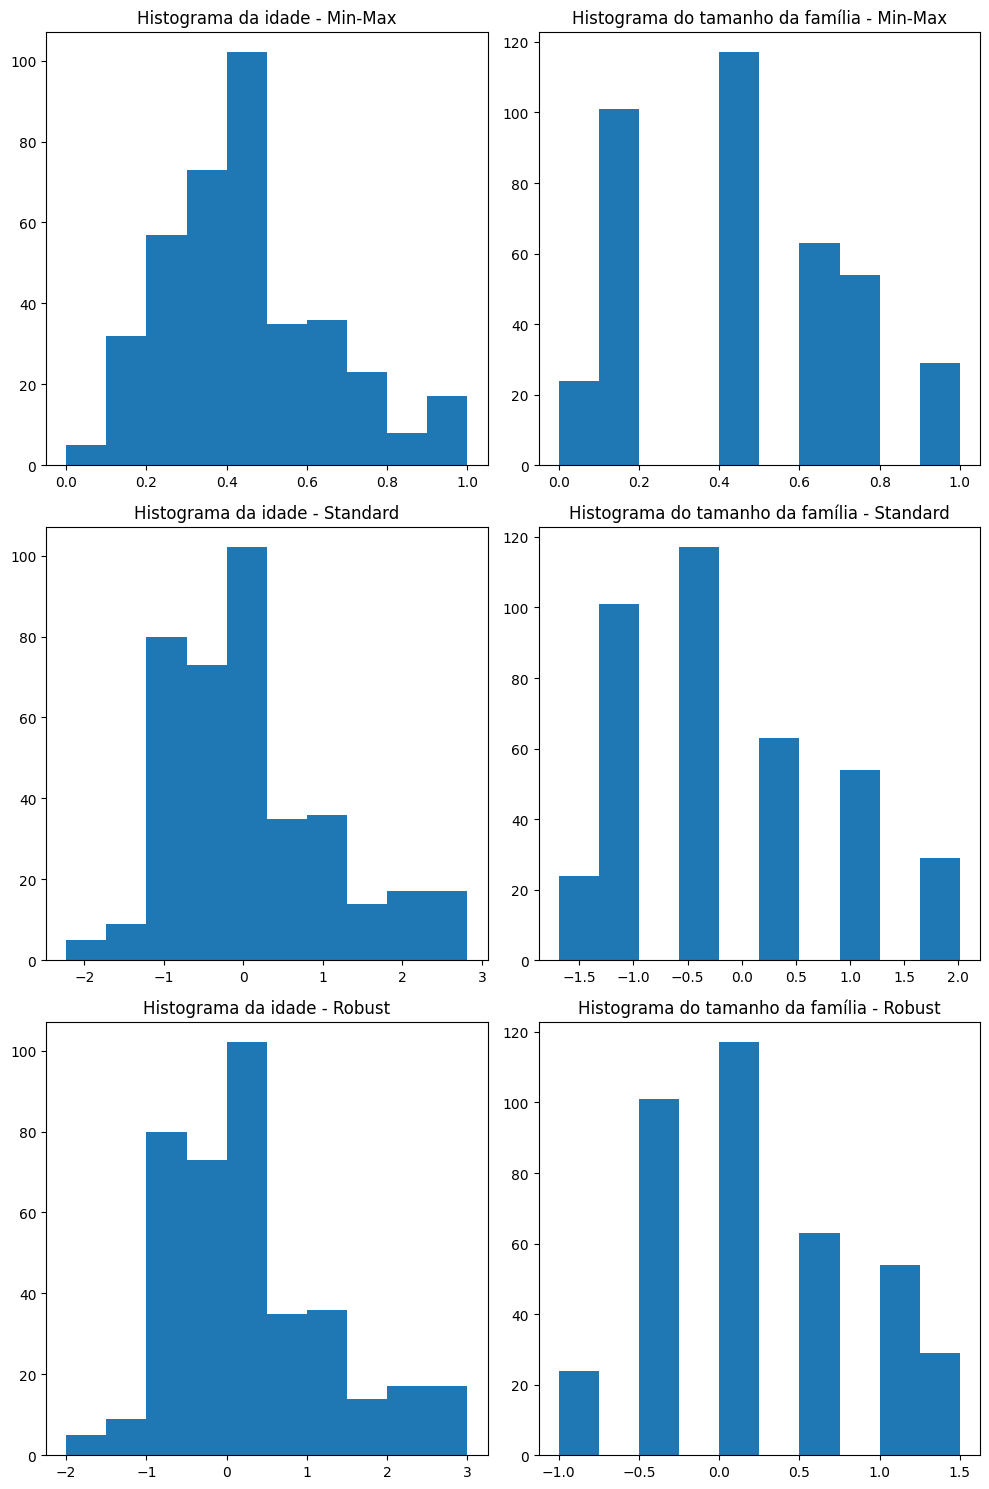

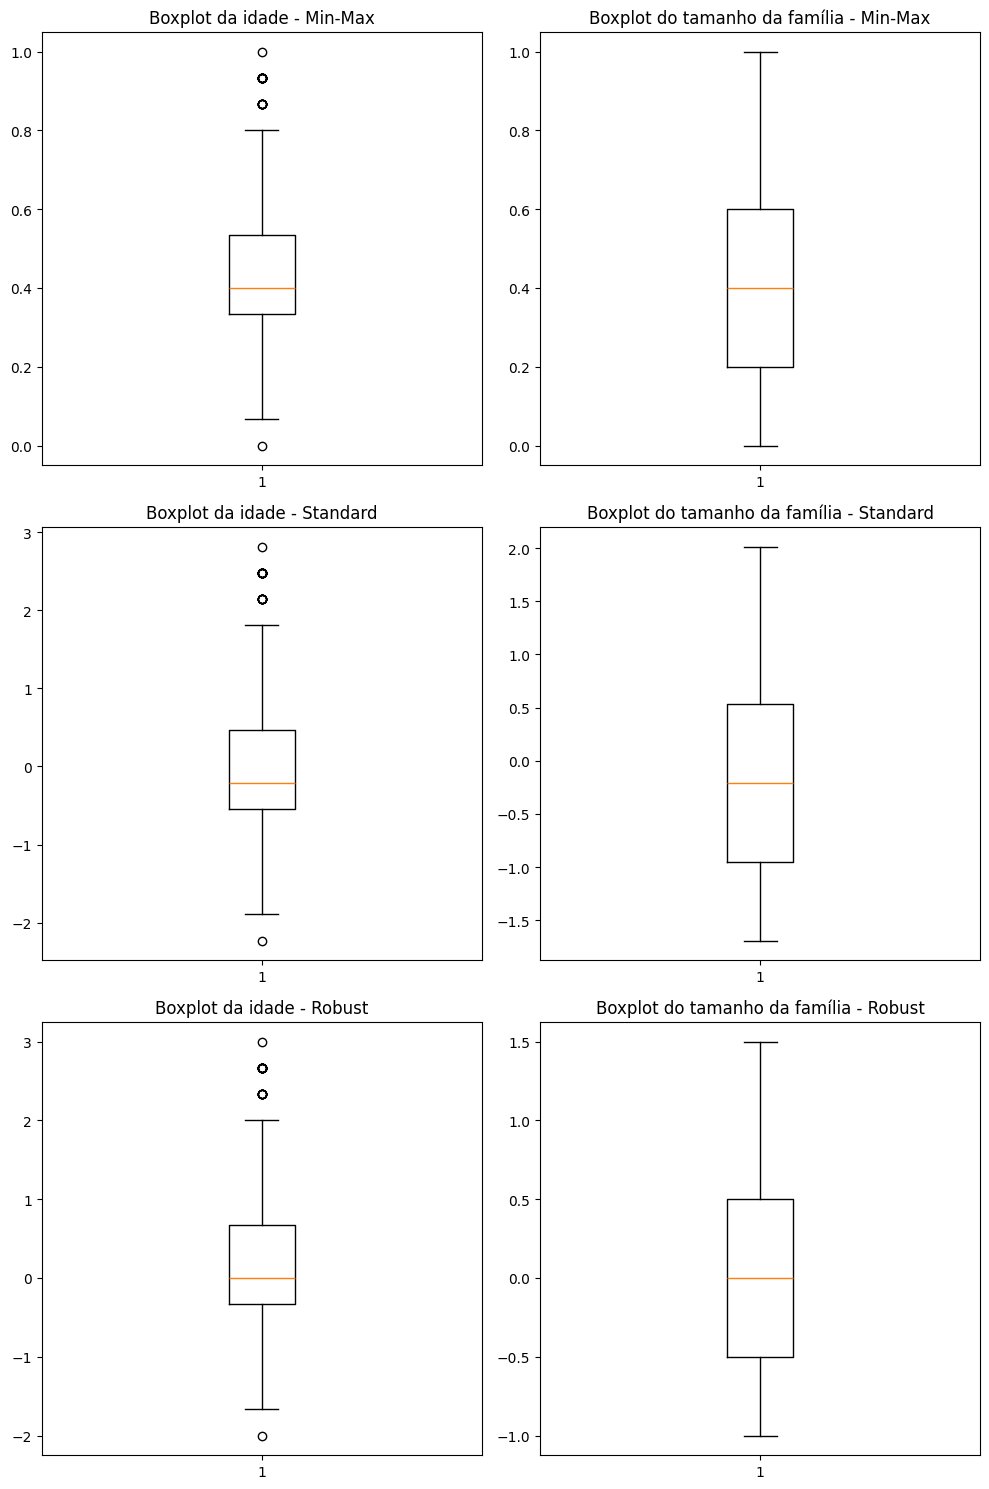

In [51]:
# Normalização

# Min-Max
scaler = MinMaxScaler()
ageMinMax = scaler.fit_transform(age.values.reshape(-1, 1))
family_sizeMinMax = scaler.fit_transform(family_size.values.reshape(-1, 1))

# Standard
scaler = StandardScaler()
ageStandard = scaler.fit_transform(age.values.reshape(-1, 1))
family_sizeStandard = scaler.fit_transform(family_size.values.reshape(-1, 1))

# Robust
scaler = RobustScaler()
ageRobust = scaler.fit_transform(age.values.reshape(-1, 1))
family_sizeRobust = scaler.fit_transform(family_size.values.reshape(-1, 1))

fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Cria uma figura com 2 subplots

# Min-Max
axs[0, 0].hist(ageMinMax)
axs[0, 0].set_title('Histograma da idade - Min-Max')

axs[0, 1].hist(family_sizeMinMax)
axs[0, 1].set_title('Histograma do tamanho da família - Min-Max')

# Standard
axs[1, 0].hist(ageStandard)
axs[1, 0].set_title('Histograma da idade - Standard')

axs[1, 1].hist(family_sizeStandard)
axs[1, 1].set_title('Histograma do tamanho da família - Standard')

# Robust

axs[2, 0].hist(ageRobust)
axs[2, 0].set_title('Histograma da idade - Robust')

axs[2, 1].hist(family_sizeRobust)
axs[2, 1].set_title('Histograma do tamanho da família - Robust')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Boxplot

fig, axs = plt.subplots(3, 2, figsize=(10, 15))  # Cria uma figura com 2 subplots

# Min-Max
axs[0, 0].boxplot(ageMinMax)
axs[0, 0].set_title('Boxplot da idade - Min-Max')

axs[0, 1].boxplot(family_sizeMinMax)
axs[0, 1].set_title('Boxplot do tamanho da família - Min-Max')

# Standard

axs[1, 0].boxplot(ageStandard)
axs[1, 0].set_title('Boxplot da idade - Standard')

axs[1, 1].boxplot(family_sizeStandard)
axs[1, 1].set_title('Boxplot do tamanho da família - Standard')

# Robust

axs[2, 0].boxplot(ageRobust)
axs[2, 0].set_title('Boxplot da idade - Robust')

axs[2, 1].boxplot(family_sizeRobust)
axs[2, 1].set_title('Boxplot do tamanho da família - Robust')


plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()








Transformada de categoricos para 3 formas:

In [68]:
# Codificacao ordinal
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()

#Atributos Categoricos
gender = dataset['Gender']
ms = dataset['Marital Status']
occupation = dataset['Occupation']
mi = dataset['Monthly Income']
eq = dataset['Educational Qualifications']
output = dataset['Output']
feedback = dataset['Feedback']

genderEncoded = encoder.fit_transform(gender.values.reshape(-1, 1))
msEncoded = encoder.fit_transform(ms.values.reshape(-1, 1))
occupationEncoded = encoder.fit_transform(occupation.values.reshape(-1, 1))
miEncoded = encoder.fit_transform(mi.values.reshape(-1, 1))
eqEncoded = encoder.fit_transform(eq.values.reshape(-1, 1))
outputEncoded = encoder.fit_transform(output.values.reshape(-1, 1))
feedbackEncoded = encoder.fit_transform(feedback.values.reshape(-1, 1))

# Codificacao One-Hot
encoder = OneHotEncoder()

genderOneHot = encoder.fit_transform(gender.values.reshape(-1, 1)).toarray()
msOneHot = encoder.fit_transform(ms.values.reshape(-1, 1)).toarray()
occupationOneHot = encoder.fit_transform(occupation.values.reshape(-1, 1)).toarray()
miOneHot = encoder.fit_transform(mi.values.reshape(-1, 1)).toarray()
eqOneHot = encoder.fit_transform(eq.values.reshape(-1, 1)).toarray()
outputOneHot = encoder.fit_transform(output.values.reshape(-1, 1)).toarray()
feedbackOneHot = encoder.fit_transform(feedback.values.reshape(-1, 1)).toarray()

# Dummy Variables
genderDummy = pd.get_dummies(dataset['Gender'], drop_first=True)
msDummy = pd.get_dummies(dataset['Marital Status'], drop_first=True)
occupationDummy = pd.get_dummies(dataset['Occupation'], drop_first=True)
miDummy = pd.get_dummies(dataset['Monthly Income'], drop_first=True)
eqDummy = pd.get_dummies(dataset['Educational Qualifications'], drop_first=True)
outputDummy = pd.get_dummies(dataset['Output'], drop_first=True)
feedbackDummy = pd.get_dummies(dataset['Feedback'], drop_first=True)


